<a href="https://colab.research.google.com/github/zdravkogospocic/Black-Jack-game/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

## This is a Colab notebook!

 #🦴 End-to-end Multi-class Dog Breed Classification

 This notebook builds an end to end multi-class image classifier using 

 TensorFlow 2.0 and TensorFlow Hub

 ## 1.Problem

 Identifying the breed of dog given an image of the dog

 When I am sitting in cafe and I take photo of dog
 i want to know what breed of dog it is'

 ## 2. Data

 Data were using is from Kaggle's 
dog breed identification competition.

## 3. Evaluation

 The evaluation is a 
file with prediction probabilites for each dog 
breed of each test image

## 4. Features

 Some information about the data

 We 're dealing with images(unstructured data)
so its probably we use deep learning/transfer leraning.
 There are 120 breeds of dogs
 There are around 
 10,000+ images in the training set

### Get our workspace ready

* Import TensorFlow 2.x
* Import tensorflow Hub
* Make sure we're using a GPU


In [1]:
# Import TensorFlow into Colab
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability

print("GPU", "avaliable (YeSSSS!!!)" 
      if tf.config.list_physical_devices("GPU") else "not avaliable :(")

TF version: 2.9.2
TF Hub version: 0.12.0
GPU avaliable (YeSSSS!!!)


## Getting our data ready (trainig into Tensors)

 ## Transform
 

In [5]:
!unzip "drive/MyDrive/DZUKELE/dog-breed-identification.zip" -d "drive/MyDrive/DZUKELE/"


Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/DZUKELE/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: drive/MyDrive/DZUKELE/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: drive/MyDrive/DZUKELE/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: drive/MyDrive/DZUKELE/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: drive/MyDrive/DZUKELE/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: drive/MyDrive/DZUKELE/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: drive/MyDrive/DZUKELE/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: drive/MyDrive/DZUKELE/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: drive/MyDrive/DZUKELE/train/83fad0718581a696132c96c166472627.jpg  
  inflating: drive/MyDrive/DZUKELE/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: drive/MyDrive/DZUKELE/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: drive/MyDrive/DZUKELE/train/8406d837b2d7fac1c3cd621abb4c

In [7]:
# Checkout the labels of our data 

import pandas as pd

labels_csv = pd.read_csv("drive/MyDrive/DZUKELE/labels.csv")

print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [8]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


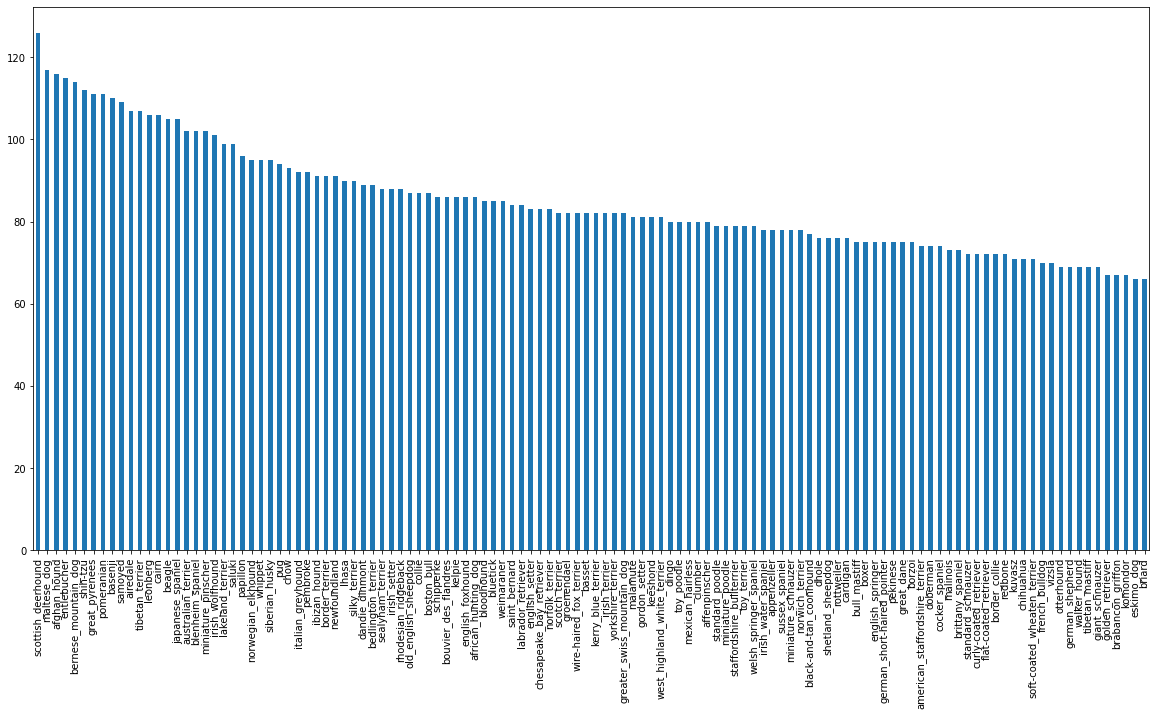

In [9]:
# How many images are there of each breed??

labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

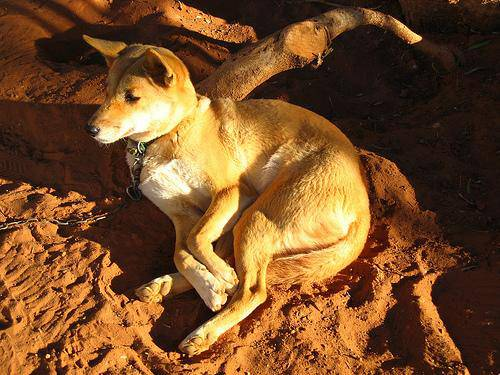

In [11]:
# Lets view an image

from IPython.display import Image

Image("drive/MyDrive/DZUKELE/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and labels
* Lets get a list of all our images file pathname

In [15]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [18]:
# Create pathnames from Image IDs

filenames= ["drive/MyDrive/DZUKELE/train/" + fname +".jpg" for fname in labels_csv['id']]

filenames[:10]

['drive/MyDrive/DZUKELE/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DZUKELE/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DZUKELE/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DZUKELE/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DZUKELE/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DZUKELE/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DZUKELE/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DZUKELE/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DZUKELE/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DZUKELE/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [21]:
import os
os.listdir("drive/MyDrive/DZUKELE/train")[:10]

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

In [23]:
# Check wheter number of filenames match number od actual image files
import os 

if len(os.listdir("drive/MyDrive/DZUKELE/train"))==len(filenames):
  print("Filenames match actual amount od files! Proceed")
else:
  print("Filenames do not match actual amount of files, check the target directory")


Filenames match actual amount od files! Proceed


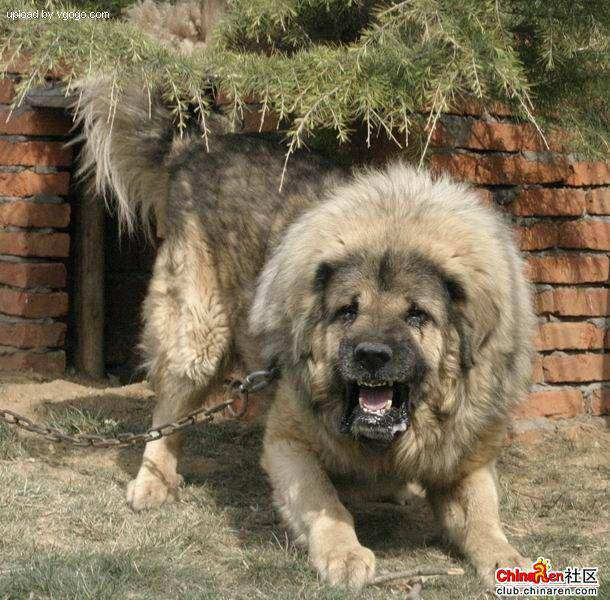

In [25]:
# One more check 

Image(filenames[9000])

In [27]:
labels_csv["breed"][9000]

'tibetan_mastiff'

### Science we have not got our training images in list, lets prepate our labels

In [29]:
import numpy as np
labels= labels_csv["breed"] ###or .to_numpy()
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

# See if number of labels matches number of filenames

In [30]:
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels doesnt match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [32]:
# Find the unique label values

unique_breeds = np.unique(labels)
unique_breeds
len(unique_breeds)

120

In [33]:
# Turn a single label into an array of booleans 

print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [34]:
# Turn every label label into a boolean array

boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [35]:
len(boolean_labels)

10222

In [36]:
# Example turning boolean array into integers 

print(labels[0])
print(np.where(unique_breeds==labels[0])) # Index where label occurs
print(boolean_labels[0].argmax()) # Index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [38]:
print(labels[2])
print(boolean_labels[2].astype(int))
print(np.where(unique_breeds==labels[2]))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
(array([85]),)


In [39]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [40]:
## Setup x and y variables

x= filenames
y= boolean_labels

We are going to start off experimenting with --10000 images and increase needed

In [46]:
# Set number of imges to use for experimenting

NUM_IMAGES =1000  #@param {type:"slider", min:1000,max:10000,step:1000}

In [47]:
# Lets split our data into train and validation sets

from sklearn.model_selection import train_test_split

#np.random.seed(42)

# Split into training and validation of total size NUM_IMAGES

x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],
                                               test_size = 0.2, random_state=42)

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [48]:
# Lets have a geez at the training data

x_train[:5], y_train[:2]

(['drive/MyDrive/DZUKELE/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/DZUKELE/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/DZUKELE/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/DZUKELE/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/DZUKELE/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
 

## Preprocessing Images (turning Images into Tensors)

* To preroces our images into tensor we are going ro write a fucntion which does few thing:

1. take an image filepath as input 
2. Use TensorFlow to read the file and save it ot a variable, image
3. turn our image (a jpg) into Tensors 
4. Resize the image to be a shpae of (244,244)
5. return the modified image

In [135]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [56]:
# Turning images into tensors
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

### LETS MAKE FUNCTON TO PREPROCESS THEM

In [66]:
# Define image size
IMG_SIZE = 224

In [74]:
# Createing a function for preprocesing images

def process_image(image_path):
  """
  Takes an image file path and turns the image into a Tensor
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turns the jpeg into numerical Tensor with 3 colour channels (Red,Green, Blue)

  image= tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-255 to 0-1 values

  image = tf.image.convert_image_dtype(image,tf.float32)

  # Resize the image to our desire value (224,2444)

  image = tf.image.resize(image, size=[IMG_SIZE,IMG_SIZE])

  return image



## Turning our data into batches(serije)

Why to turn our data into batches?

Lets say you re trying to proceed 10,000+ images in one go... they all might not fit into memory

So thats why we do about 32 (this is the batch size) 
you can mannually adjust the batch size if need be)

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this(image,label)

In [78]:
# Create a simple function to return a tuple(image,label)

def get_image_label(image_path,label):

#Takes an image file path name and the associated 
#label, processes the image and retruns a tuple of (image,label)

  image=process_image(image_path)
  return image, label

In [77]:
# Demo od ovoga iznad
(process_image(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we have got a way to trun our data into tuples of Tensors in the for (image,label) lets make a function to turn all our date (x & y) ito batches

In [88]:
data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

data_batch = data.map(get_image_label).batch(32)


data_batch




<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [82]:
# Define a batch size, 32 is a good size

BATCH_SIZE = 32

# Create a function to turn data into batches

def create_data_batches(x,y=None,batch_size=BATCH_SIZE, valid_data=False,test_data=False):

  ''' Creates batches of data out of image (x) and (y) pairs.
  Shuggles the data if its training data
   but doesnt shuffle if its validation data
  '''
  # if the data is a test dataset, we probably dont habe labels

  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))

    data_batch = data.map(process_image).batch(BATCH_SIZE)

    return data_batch

    # If the data is avalid dataset, we dont need to shuffle it

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels

    data_batch = data.map(get_image_label).batch(BATCH_SIZE)

    return data_batch
  
  else:
    print("Create training data batches")
    # Turn filepaths and labels into Tensors

    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    
    # Suffling pathnames and labels before mapping image processor function is faster than shuffing images


    data = data.shuffle(buffer_size=len(x))
    # Create (image, label) tuples (this also turns the image path into preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches

    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [125]:
# Creating trainig and validation data batches

train_data = create_data_batches(x_train,y_train)
val_data= create_data_batches(x_val,y_val, valid_data=True)

Create training data batches
Creating validation data batches...


In [126]:
# Check out the different attributes of our data batches

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizatiing Data Batches 

* Our data is now in batches, however, these can be a little hard to understand/ comprehend

In [141]:
import matplotlib.pyplot as plt


# Create a function for viewing images in a data batch 

def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch
  """

# Setup the figure

  plt.figure(figsize=(10,10))

# Loop thorugh 25 ( for displaying 25 images)

  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
# Display an image
    plt.imshow(images[i])
# Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])

# Turn the grid lines off
   # plt.axis("off")

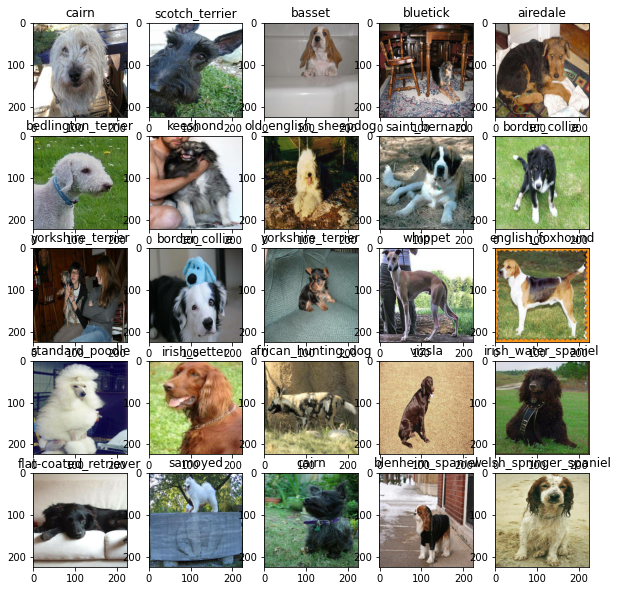

In [142]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)


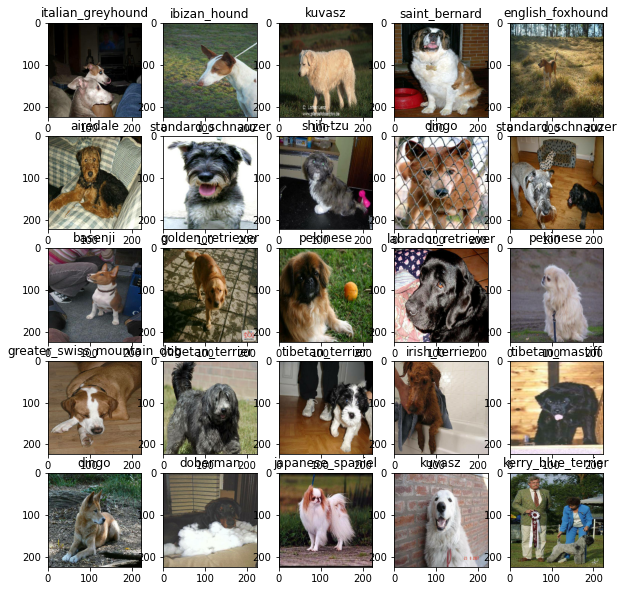

In [144]:

train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)